## Telco Customer Churn 

Goal: Based on a real_world data from Telco industry, effectively predict customer churn.
The goal is to create logistic regression and random forest machine learning models that can forecast customer churn.  

In [2]:
# Import librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score


## Load and inspect the dataset

In [3]:
# Load the Telco dataset

telco_df = pd.read_csv('Telco-Customer-Churn.csv')

telco_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Print information about the DataFrame
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing 

In [5]:
# Check on missing values in the dataset
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no rows with missing values in the dataset.

We proceeded with converting 'TotalCharges' from object to numerical value but Pandas returned the error showing empty strings ' ' that cannot be converted to numeric values. So, now, we will identify rows with empty strings in the column and will drop them, if their number is low so model poredictions are not affected. 

We will then convert the 'TotalCharges' values from object to numerical datatype.

In [6]:
# Rows with empty '' strings
empty_rows = telco_df[telco_df['TotalCharges'].str.strip() == '']
print(f'Number of empty rows: {len(empty_rows)}')

Number of empty rows: 11


In [7]:
# Remove rows with empty strings
telco_df = telco_df[telco_df['TotalCharges'].str.strip() != ''].copy()

# Convert to numeric
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df['TotalCharges'].dtype

dtype('float64')

We will now look at all value data types and will convert object types into numeric values to prepare the dataset for model creation 

In [8]:
# Churn is the target value, we will convert it to a binary numeric value.
# Firstly, we will check unique values in column Churn
telco_df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
# Churn is a binary target column,  so we will use label encoding here
encoder = LabelEncoder()
churn_encoded = encoder.fit_transform(telco_df['Churn'])
print(churn_encoded[:10])


[0 0 1 0 1 1 0 0 1 0]


In [10]:
# Remove 'customerId' column from the dataset
telco_df = telco_df.drop('customerID', axis=1)
telco_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [11]:
# We will now convert all categorical values into numeric.
# First, we will check unique values in each category to understand
# the data and check if no weird entries.

unique_values = pd.DataFrame({
    'Unique Count': telco_df.select_dtypes('object').nunique(),
    'Unique Values': [
        ', '.join(map(str, telco_df[col].unique()[:5])) +
        (' ...' if telco_df[col].nunique() > 5 else '')
        for col in telco_df.select_dtypes('object').columns
    ]
})
pd.set_option('display.max_colwidth', None)
display(unique_values)

,Unique Count,Unique Values
gender,2,"Female, Male"
Partner,2,"Yes, No"
Dependents,2,"No, Yes"
PhoneService,2,"No, Yes"
MultipleLines,3,"No phone service, No, Yes"
InternetService,3,"DSL, Fiber optic, No"
OnlineSecurity,3,"No, Yes, No internet service"
OnlineBackup,3,"Yes, No, No internet service"
DeviceProtection,3,"No, Yes, No internet service"
TechSupport,3,"No, Yes, No internet service"


The unique value inspection shows that several features: 'InternetService', 'OnlineSecurity','OnlineBackup', DeviceProtection', TechSupport', 'StreamingTV', and 'StreamingMovies' are innerconnected through "Internet service'. Customers without an internet connection have 'No Internet Service'listed across all these dependent features. 

Similarly, 'MultipleLines' depends on 'Phone Service' where customers with 'No phone service' cannot have multiple lines.  

To maintain a clean and efficient dataset before encoding:

1. We will replace 'No Internet service' and 'No phone service' with 'No' to simplify the categories and reduce redundant dummy columns.

2. We will consider a hybrid modelling approach: 

    * For the Logistic Regression model, we may drop the interconnected columns, as this algorythm is sensitive to multicollinearity and redundant features.

    * For Random Forest model, we will retain all interconnected columns, since tree-based methods handle correlated variables effectively and may capture additional patterns from these related features.


In [12]:
# Replace redundant 'No Internet/phone service' with 'No'

cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
cols_phone = ['MultipleLines']
telco_df[cols_internet] = telco_df[cols_internet].replace('No internet service', 'No')
telco_df[cols_phone] = telco_df[cols_phone].replace('No phone service', 'No')

# Lets quickly check the result
for col in cols_internet:
    print(f"{col}: {telco_df[col].unique()[:5]}")
for col in cols_phone:
    print(f"{col}: {telco_df[col].unique()[:5]}")


OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
MultipleLines: ['No' 'Yes']


In [13]:
# Lets use pd.get_dummies() to encode all object categories
telecom_cust_dummies = pd.get_dummies(telco_df, drop_first=True)
telecom_cust_dummies.info()
telecom_cust_dummies.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_Yes                      7032 non-null   bool   
 9   InternetService_Fiber optic            7032 non-null   bool   
 10  InternetService_No                     7032 non-null   bool   
 11  OnlineSec

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True


Encoding reduced feature redundancy quite significantly, making multicollinearity minimal - there are 24 columns only and each column expresses 
a unique aspect.

The dataset is now balanced and interpretable.

There is no need in dropping columns for Logistic Regression as it might remove useful information.

## Data Visualisation 

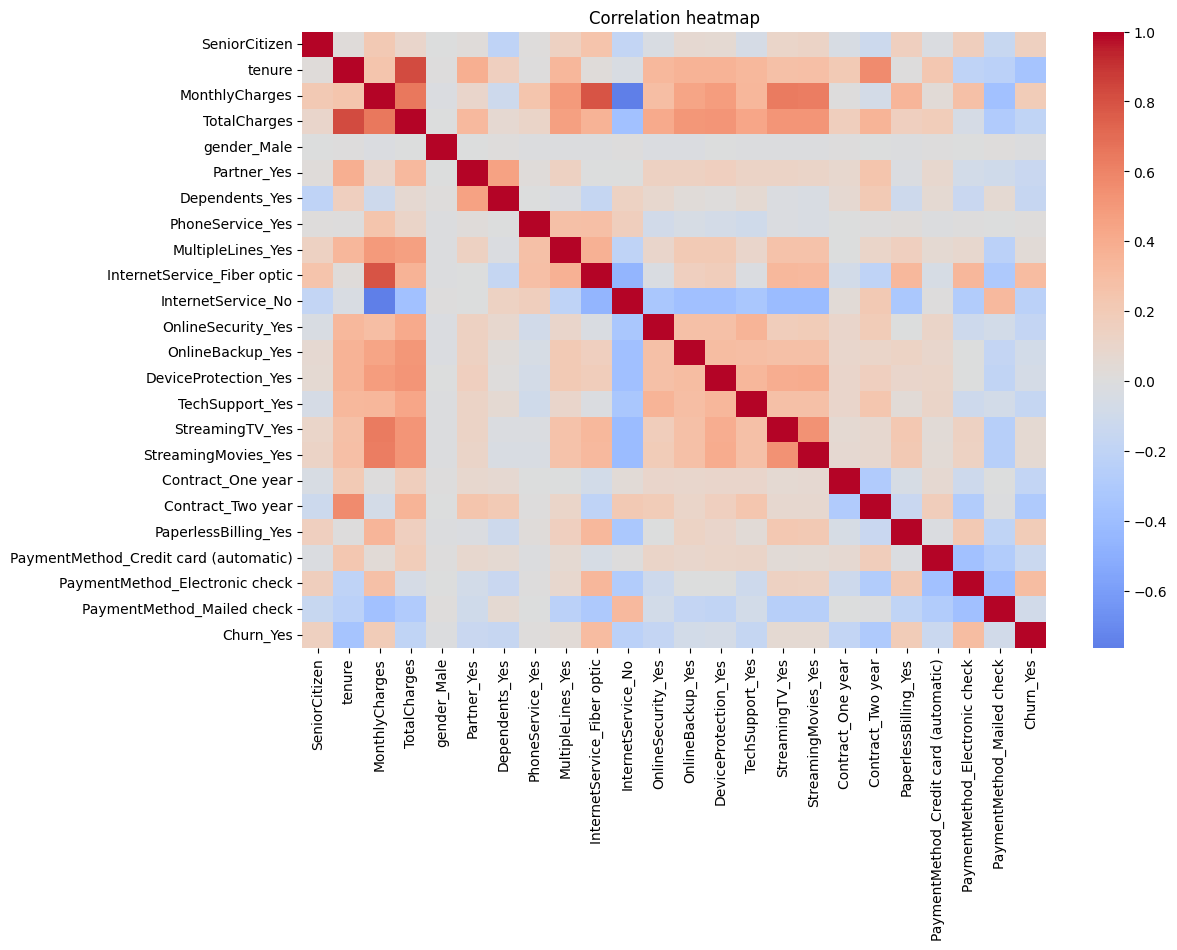

In [14]:
# Correlation heatmap between all features
plt.figure(figsize=(12,8))
sns.heatmap (telecom_cust_dummies.corr(), cmap='coolwarm', center=0)
plt.title('Correlation heatmap')
plt. show()

Heatmap shows strong positive correlation between the following pairs of features:

* 'TotalCharges' and 'Tenure' - customers who have been with the company longer tend to have higher total charges. 
* 'InternetService_Fiber optic' and 'Monthly Charges' - fiber-optic customers typically pay higher total charges. 
* 'StreamingTV'/'StreamingMovies' and 'MonthlyCharges'- customers using entertainment services generally have higher monthly bills.
* 'Tenure' and 'Contract_Two year' - customers with longer tenture are more likely to have long-term contracts.

Conversly, the heatmap shows negative correlation between 'Internet_Service_No' and the internet-related service features: 'InternetService_Fiber optic', 'OnlineSecurity','OnlineBackup', DeviceProtection', TechSupport', 'StreamingTV', and 'StreamingMovies', which is expected, as customers without internet service do not subscribe to any of these add-on options. 

/var/folders/2n/j9x3mlmd24q3s64tn3nx8qt80000gn/T/ipykernel_7299/705202105.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, orient='h', palette='coolwarm')


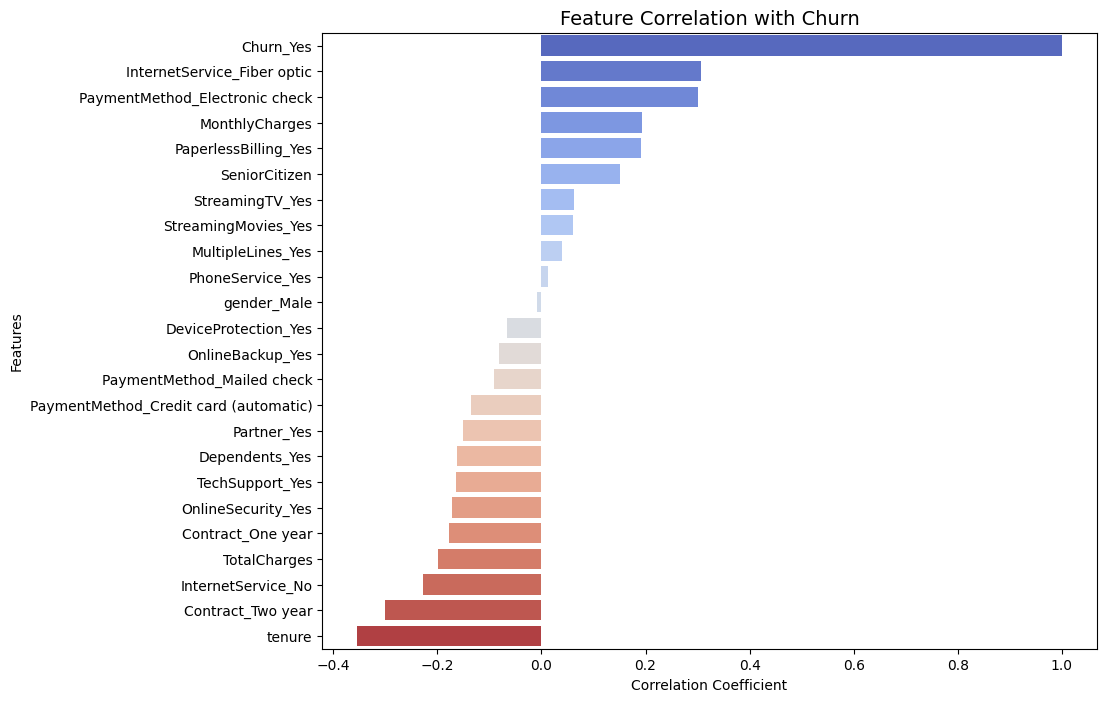

In [15]:
# Correlation with Churn
plt.figure(figsize=(10,8))
corr_with_churn = telecom_cust_dummies.corr()['Churn_Yes'].sort_values(ascending=False)

# Create a barplot for better readability
sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, orient='h', palette='coolwarm')
plt.title('Feature Correlation with Churn', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

The correlation analysis shows that 'InternetService_Fiber optic' and 'PaymentMethod_Electronic check' have the strongest positive correlation with churn, indicating higher churn rates among these customers. 

In contrast, 'tenure', 'Contract_Two year', and 'InternetService_No' show the strongest negative correlation, suggesting that long-term customers, or those without internet service are less likely to churn.

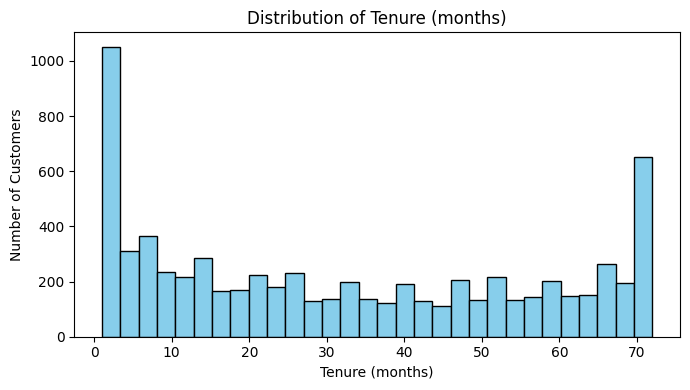

In [16]:
# Histogram of tenure
plt.figure(figsize=(7, 4))
plt.hist(telco_df['tenure'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Tenure (months)')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Tenure Distribution observations:

* The largest customer group (~900 customers) consists of new users who have been with the company for only 2–3 months.

* Another large group (~700 customers) represents long-term, loyal customers with a tenure of more than 70 months (about 6 years).

* After the first three months, the number of customers drops by more than 50%, indicating a significant early churn window where many new customers discontinue their service.

* The distribution suggests a bimodal pattern - one peak among new users and another among long-term users, highlighting the contrast between early churners and highly retained customers.

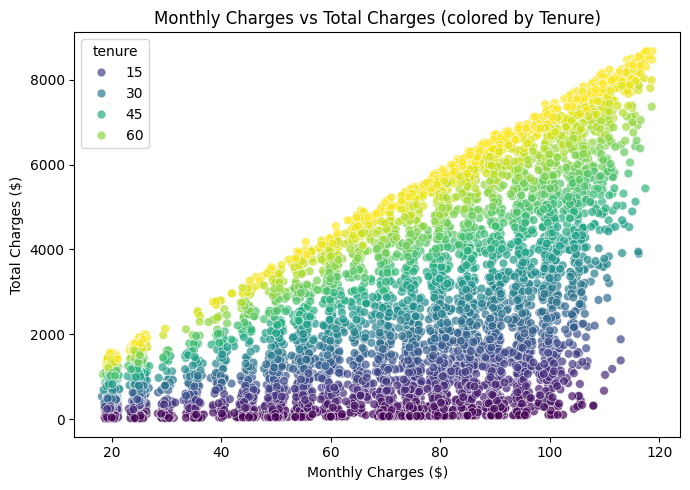

In [17]:
# Scatter plot of “MonthlyCharges” vs. “TotalCharges” coloured by tenure
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=telco_df,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='tenure',
    palette='viridis',
    alpha=0.7,
    s=40
)
plt.title('Monthly Charges vs Total Charges (colored by Tenure)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Total Charges ($)')
plt.tight_layout()
plt.show()

The scatterplot of MontlyCharges vs. TotalCharges forms a triangle pattern with an upper diagonal edge. It reflects that TotalCharges increase proportionally with tenure as long_term customers accumulate higher total payments.

New customers appear near the x-axis with low total charges.

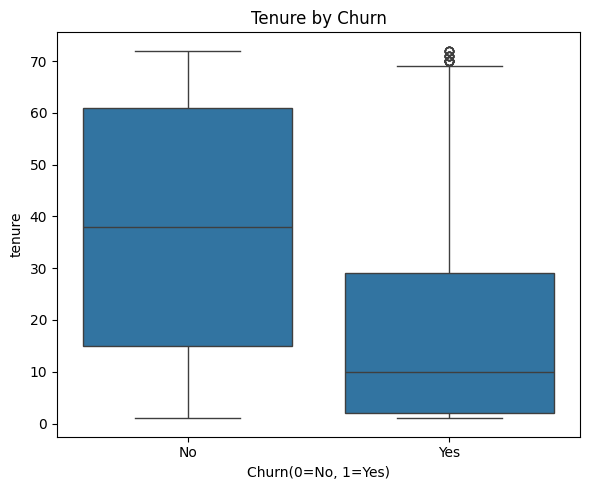

In [18]:
# Box plot: tenure by churned vs not churned (0 = no churn, 1 = churn)
plt.figure(figsize=(6,5))
sns.boxplot(x='Churn', y='tenure', data=telco_df)
plt.title('Tenure by Churn')
plt.xlabel('Churn(0=No, 1=Yes)')
plt.tight_layout()
plt.show()


In [19]:
# Summary stats by churn group to support intepretations of boxplots
tenure_summary = telco_df.groupby('Churn')['tenure'].describe()
display(tenure_summary)

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


Observations - Tenure by Churn

* Non-churned customers have a much longer average tenure (~38 months) compared to churned customers (~18 months).
* The median tenure is 38 months for non-churners and 10 months for churners, showing that customers who churn typically leave early.
* Overall, longer-tenure customers are far less likely to churn, confirming that customer longevity is strongly linked to retention.


We spotted positive correlation between 'InternetService_Fiber optic' and Churn. Lets dig a bit deeper.

In [20]:
# We first check what proportion of the total population belongs to customers
# who use Internet service

fiber_pct = (telco_df['InternetService'].value_counts(normalize=True) * 100)
print(fiber_pct)

InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: proportion, dtype: float64


78% of all customers subscribe to Internet service, with 44% - using Fiber optic and 34% - DSL.

Let us check correlation between each Internet service with churn.

In [21]:
churn_corr_internet = (
    telecom_cust_dummies[
        ['InternetService_Fiber optic', 'InternetService_No', 'Churn_Yes']
        ]
        .corr()['Churn_Yes']
        .sort_values(ascending=False))
print(churn_corr_internet)

Churn_Yes                      1.000000
InternetService_Fiber optic    0.307463
InternetService_No            -0.227578
Name: Churn_Yes, dtype: float64


Interpretation: 

Fiber optic - positive correlation with churn (higher churn risk)

No internet - negative correlation (lower churn)

DSL - baseline(implicitly lower churn than Fiber Optic since it was dropped during encoding)

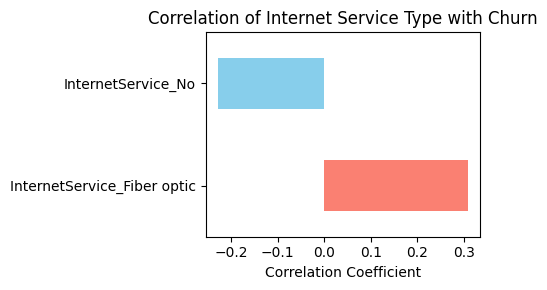

In [22]:
plt.figure(figsize=(5,3))
churn_corr_internet.drop('Churn_Yes').plot(kind='barh', color=['salmon', 'skyblue'])
plt.title('Correlation of Internet Service Type with Churn')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


We will now enhance our thinking using ML models = Logistic Regression and Random Forest 

## Preparation for ML training

Feature scaling (Min_Max Normalisation)

In [23]:
# Separate features and target variable
X = telecom_cust_dummies.drop(columns=['Churn_Yes'])
y = telecom_cust_dummies['Churn_Yes']

# Initialize and apply the scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# We do not scale y as it represents a binary target variable, that models
# do not require scaling

In [24]:
# Train-Test split (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")

Training set: 5274 rows
Test set: 1758 rows


## Logistic Regression Model 

In [25]:
# Initialise the model with higher iteration limit for convergence
log_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)

print(f'Logistic Regression Accuracy:{log_accuracy:.4}')

Logistic Regression Accuracy:0.8055


Logistic Regression score interpretation 

The model correctly predicted 81% of churn outcomes in the test set.

## Random Forest Model 

In [26]:
rf_model = RandomForestClassifier(
    n_estimators = 2000,     # Number of trees
    oob_score=True,         # Enable OOB validation
    max_features='sqrt',    # Feature subset pers plit
    max_leaf_nodes=50,      # Limit tree complexity
    bootstrap=True,         # Use bootstrapping
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Compute OOB error estimate
oob_error = 1 - rf_model.oob_score_

print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print (f'OOB Error Estimate: {oob_error:.4f}(OOB Score = {rf_model.oob_score_}')

0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Random Forest Accuracy: 0.7941
OOB Error Estimate: 0.2004(OOB Score = 0.7995828593098218


Random Forest scores interpretation: 

Accuracy = 0.7941 - the model correctly predicted churn status for about 79% of test customers.

OOB Score = ~ 0.80, an internal cross-validation score.

The alignment (OOB~test accuracy) shows that the model generalizes well - not overfitting 


## Enhanced Model Evaluation 

In [27]:
# Logistic Regression metrics
cm_log = confusion_matrix(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)

# Random Forest metrics
cm_rf = confusion_matrix(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)

print("---Logistic Regression ---")
print("Confusion Matrix:\n", cm_log)
print(f"Precision: {prec_log:.3f} | Recall: {rec_log:.3f}")

print("\n---Random Forest ---")
print("Confusion Matrix:\n", cm_rf)
print(f"Precision: {prec_rf:.3f} | Recall: {rec_rf:.3f}")

---Logistic Regression ---
Confusion Matrix:
 [[1149  142]
 [ 200  267]]
Precision: 0.653 | Recall: 0.572

---Random Forest ---
Confusion Matrix:
 [[1183  108]
 [ 254  213]]
Precision: 0.664 | Recall: 0.456


The confusion matrices show how well each model distinguishes between who churn and those who stay. 

Logistic regression results:

TN = 1149

FP = 142

FN = 200

TP = 267

Precision: of all customers predicted to churn, 65% actually did.

Recall: Of all true churners, 57% were correctly identified 

Random Foorest results:

TN = 1183

FP = 108

FN = 254

TP = 213

Precision: of all customers predicted to churn, 66% actually did.

Recall: Of all true churners, 46% were correctly identified. 

 So, Random Forest made fewer false predictions - slightly better prtecision, but missed more churners - much lower recall than Logistic Regression 

## Summary 

* Both models are around 80% accurate.
* Logistic Regression better catches churners (higher recall).
* Random Forest gives fewer false alarms (higher precision) but misses many more actual churners.
* In our task on churn prediction, recall is more important, because missing a churner means losing a customer.

So, for the task at hand, that is prevention of customer churn ( customer retention), Logistic Regression is more suitable.
